In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-aug-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-aug-2022/train.csv
/kaggle/input/tabular-playground-series-aug-2022/test.csv


In [2]:
train_df_orig = pd.read_csv('../input/tabular-playground-series-aug-2022/train.csv')
train_df = train_df_orig.copy()

test_df_orig = pd.read_csv('../input/tabular-playground-series-aug-2022/test.csv')
test_df = test_df_orig.copy()

In [3]:
train_df.head(2)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0


### Transform String value to integer values

In [4]:
string_column = ['product_code', 'attribute_0', 'attribute_1']
for i in string_column:
    print("Unique value of "+str(i) +" is " + str(train_df[i].unique()))

Unique value of product_code is ['A' 'B' 'C' 'D' 'E']
Unique value of attribute_0 is ['material_7' 'material_5']
Unique value of attribute_1 is ['material_8' 'material_5' 'material_6']


In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in string_column:
    le.fit(train_df[i])
    train_df[i] = le.transform(train_df[i])
    le.fit(test_df[i])
    test_df[i] = le.transform(test_df[i])

In [6]:
train_df.head(1)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,0,80.1,1,2,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.1,0


### Check Null values in the dataframe

In [7]:
print("Train Dataset")
print(train_df.columns[train_df.isna().any()].tolist())
print("Test Dataset")
print(test_df.columns[test_df.isna().any()].tolist())

Train Dataset
['loading', 'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17']
Test Dataset
['loading', 'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17']


In [8]:
for i, j in zip(train_df.columns, test_df.columns):
    if train_df[i].isnull().sum() !=0:
        train_df[i].fillna(value = train_df[i].mean(), inplace=True)
    if test_df[j].isnull().sum() !=0:
        test_df[i].fillna(value = test_df[i].mean(), inplace=True)

In [9]:
print("Train Dataset")
print(train_df.columns[train_df.isna().any()].tolist())
print("Test Dataset")
print(test_df.columns[test_df.isna().any()].tolist())

Train Dataset
[]
Test Dataset
[]


### Distribution of Dataset

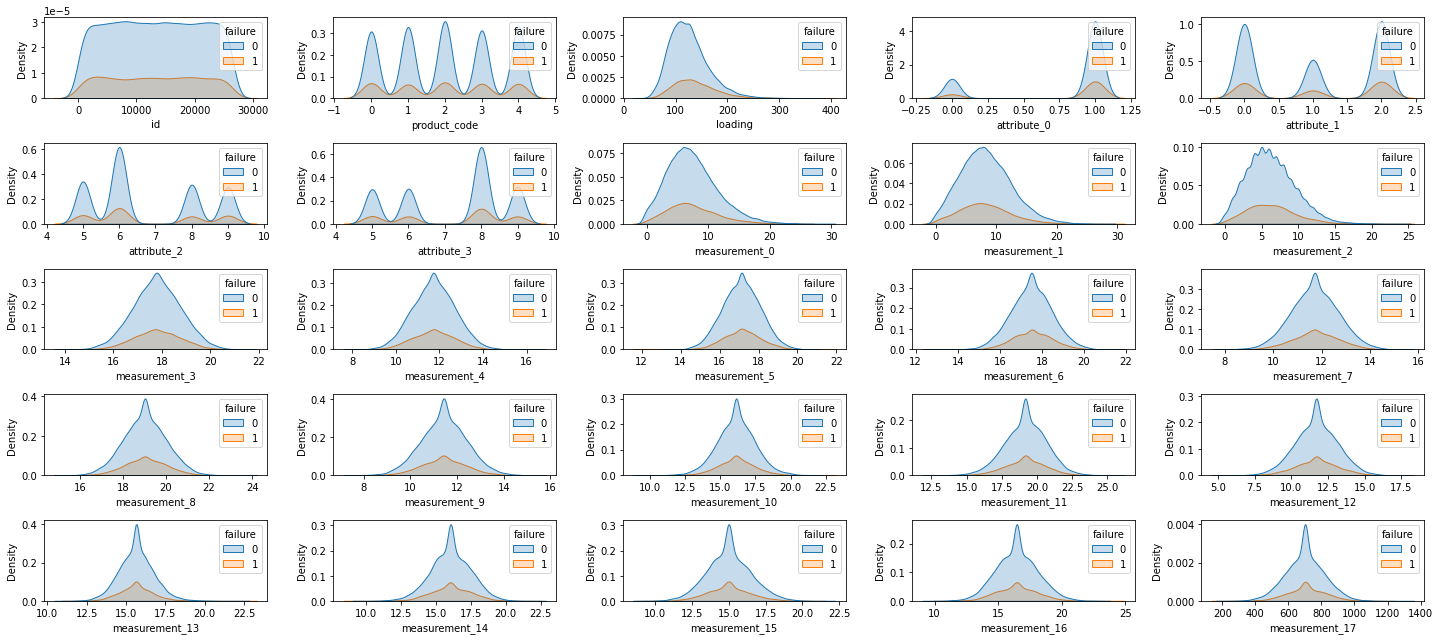

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 9), sharex = False, sharey = False)
axes = axes.ravel()  
cols = train_df.columns[:-1]

for col, ax in zip(cols, axes):
    data = train_df
    sns.kdeplot(data=data, x=col, shade=True, ax=ax, hue='failure')
    
fig.tight_layout()
plt.show()

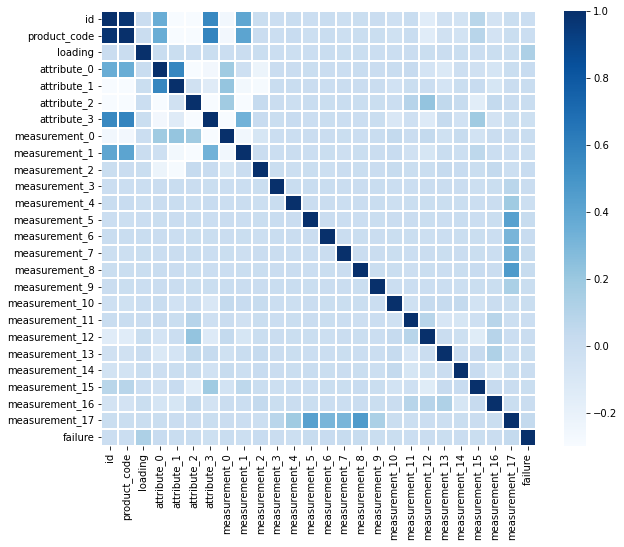

In [11]:
plt.figure(figsize = (10,8))
corr = train_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues", square=True, robust=True)
plt.show()

In [12]:
train_df.groupby('product_code').mean()

,id,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
product_code,,,,,,,,,,,,,,,,,,,,,
0,2549.5,127.472789,1.0,2.0,9.0,5.0,10.325882,4.229412,5.226078,17.808297,...,11.436223,16.124049,19.424034,12.214222,15.589697,16.107017,14.496351,16.414226,702.531029,0.227255
1,7724.5,127.322677,0.0,0.0,8.0,8.0,5.932381,8.450857,7.755810,17.788638,...,11.422425,16.091282,19.106516,11.901085,15.902812,16.100051,15.101297,16.704135,701.105245,0.200381
2,13232.0,128.124093,1.0,2.0,5.0,8.0,7.539289,8.772940,5.567216,17.791608,...,11.430834,16.131306,18.804865,11.270917,15.576981,16.100790,15.430245,16.398383,700.700378,0.211622
3,18670.5,128.430574,1.0,0.0,6.0,6.0,7.852308,9.790884,7.262520,17.775820,...,11.431733,16.453463,19.089568,11.581702,15.602480,16.107316,14.782182,16.707126,700.263600,0.217527
4,23898.0,127.758792,1.0,1.0,6.0,9.0,5.545199,9.764926,5.548381,17.793301,...,11.432548,15.801723,19.471198,11.599992,15.597839,15.829020,15.103275,16.097463,701.801030,0.207000


## Modeling

In [13]:
from sklearn.model_selection import train_test_split

X = train_df[train_df.columns[:-1]]
y = train_df['failure']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()
model_log.fit(X_train,y_train)
pred_log=model_log.predict(X_test)
log_score =model_log.score(X_train,y_train)
log_pred_score =round(log_score*100,2)
print(log_pred_score)

78.75


### XGB

In [15]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, np.ravel(y_train))

predict_xgb = xgb_model.predict_proba(X_test)
predict_xgb_prob = pd.DataFrame(predict_xgb[:,1],columns = ['Default Probability'])
xgb_probability = pd.concat([predict_xgb_prob, y_test.reset_index(drop=True)],axis=1)
xgb_probability.head()

,Default Probability,failure
0,0.049898,0
1,0.274567,1
2,0.289055,1
3,0.088347,0
4,0.344351,0


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

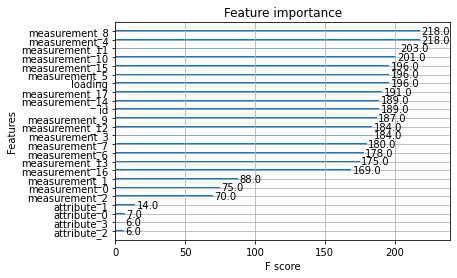

In [16]:
xgb.plot_importance(xgb_model,importance_type='weight')

In [17]:
pred_xgb=xgb_model.predict(X_test)
xgb_score =xgb_model.score(X_train,y_train)
xgb_pred_score =round(xgb_score*100,2)
print(xgb_pred_score)

87.69


### KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier()
model_knn.fit(X_train,y_train)
pred_knn=model_knn.predict(X_test)
knn_score =model_knn.score(X_train,y_train)
knn_pred_score =round(knn_score*100,2)
print(knn_pred_score)

80.54


### CatBoost

In [19]:
import catboost as cat

model_catboost = cat.CatBoostClassifier(iterations=10000,learning_rate=0.005,eval_metric='Recall')
model_catboost.fit(X_train,y_train, early_stopping_rounds=1000, verbose=1000)

0:	learn: 0.0012652	total: 69.9ms	remaining: 11m 38s
1000:	learn: 0.0000000	total: 8.06s	remaining: 1m 12s
2000:	learn: 0.0068320	total: 15.5s	remaining: 1m 1s
3000:	learn: 0.0220142	total: 22.8s	remaining: 53.3s
4000:	learn: 0.0379555	total: 30.2s	remaining: 45.2s
5000:	learn: 0.0602227	total: 37.8s	remaining: 37.8s
6000:	learn: 0.0923583	total: 45.2s	remaining: 30.1s
7000:	learn: 0.1265182	total: 52.4s	remaining: 22.4s
8000:	learn: 0.1594130	total: 59.9s	remaining: 15s
9000:	learn: 0.1920547	total: 1m 7s	remaining: 7.47s
9999:	learn: 0.2350709	total: 1m 14s	remaining: 0us


In [20]:
pred_catboost=model_catboost.predict(X_test)
catboost_score =model_catboost.score(X_test,y_test)
catboost_pred_score =round(catboost_score*100,2)
catboost_pred_score

78.69

### Gradient Boosting

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

model_gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
pred_gbdt = model_gbdt.predict(X_test)
gbdt_score = model_gbdt.score(X_test, y_test)
gbdt_pred_score  =round(gbdt_score*100,2)
gbdt_pred_score

78.53

### LinearDiscriminant (LDA)

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train,y_train)
pred_lda=model_lda.predict(X_test)
lda_score =model_lda.score(X_train,y_train)
lda_pred_score =round(lda_score*100,2)
print(lda_pred_score)

78.74


### GaussianNB

In [23]:
from sklearn.naive_bayes import GaussianNB

model_gnb =GaussianNB()
model_gnb.fit(X_train,y_train)
pred_gnb=model_gnb.predict(X_test)
gnb_score =model_gnb.score(X_train,y_train)
gnb_pred_score =round(gnb_score*100,2)
print(gnb_pred_score)

78.24


### RandomForest

In [24]:
from sklearn.ensemble import RandomForestClassifier

model_rfc =RandomForestClassifier(max_depth=2, random_state=0)
model_rfc.fit(X_train,y_train)
pred_rfc=model_rfc.predict(X_test)
rfc_score =model_rfc.score(X_train,y_train)
rfc_pred_score =round(rfc_score*100,2)
print(rfc_pred_score)

78.75


### VotingClassifier

In [25]:
from sklearn.ensemble import VotingClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

lr1 = LogisticRegression(multi_class='multinomial', random_state=1)
rfc2 = RandomForestClassifier(n_estimators=50, random_state=1)
gnb3 = GaussianNB()
model_vtc = VotingClassifier(estimators=[('lr', lr1), ('rf', rfc2), ('gnb', gnb3)], voting='soft')

model_vtc.fit(X_train,y_train)
pred_vtc=model_vtc.predict(X_test)
vtc_score =model_vtc.score(X_train,y_train)
vtc_pred_score =round(vtc_score*100,2)
print(vtc_pred_score)

80.04


## Result

In [26]:
from sklearn.metrics import classification_report

print('Logistic Regression')
print(classification_report(y_test,pred_log))

print('XGBoost')
print(classification_report(y_test,pred_xgb))

print('KNN')
print(classification_report(y_test,pred_knn))

print('CatBoost')
print(classification_report(y_test,pred_catboost))

print('GradientBoosting')
print(classification_report(y_test,pred_gbdt))

print('LinearDiscriminant')
print(classification_report(y_test,pred_lda))

print('GaussianNB')
print(classification_report(y_test,pred_gnb))
      
print('Random Forest')
print(classification_report(y_test,pred_rfc))
      
print('Voting Classifier')
print(classification_report(y_test,pred_vtc))

Logistic Regression
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      6274
           1       0.40      0.00      0.00      1697

    accuracy                           0.79      7971
   macro avg       0.59      0.50      0.44      7971
weighted avg       0.70      0.79      0.69      7971

XGBoost
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      6274
           1       0.25      0.03      0.05      1697

    accuracy                           0.77      7971
   macro avg       0.52      0.50      0.46      7971
weighted avg       0.67      0.77      0.70      7971

KNN
              precision    recall  f1-score   support

           0       0.79      0.93      0.85      6274
           1       0.21      0.07      0.10      1697

    accuracy                           0.75      7971
   macro avg       0.50      0.50      0.48      7971
weighted avg       0.66      0.75      0.6

## ROC Curve

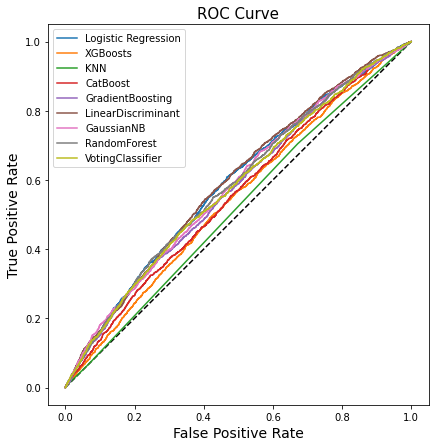

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(15,7))
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], 'k--')

model_log_proba=model_log.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_log_proba)
plt.plot(fpr, tpr, label='Logistic Regression')

xgb_model_proba=xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,xgb_model_proba)
plt.plot(fpr, tpr, label='XGBoosts')

model_knn_proba=model_knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_knn_proba)
plt.plot(fpr, tpr, label='KNN')

model_catboost_proba=model_catboost.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_catboost_proba)
plt.plot(fpr, tpr, label='CatBoost')

model_gbdt_proba=model_gbdt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_gbdt_proba)
plt.plot(fpr, tpr, label='GradientBoosting')

model_lda_proba=model_lda.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_lda_proba)
plt.plot(fpr, tpr, label='LinearDiscriminant')

model_gnb_proba=model_gnb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_gnb_proba)
plt.plot(fpr, tpr, label='GaussianNB')

model_rfc_proba=model_rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_rfc_proba)
plt.plot(fpr, tpr, label='RandomForest')

model_vtc_proba=model_vtc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_vtc_proba)
plt.plot(fpr, tpr, label='VotingClassifier')


plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC Curve',fontsize=15)
plt.legend()

Based on the ROC Curve, it shows that the Logistic Regression and LDA performs better than other model. 

In [28]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, pred_log))
print(accuracy_score(y_test, pred_lda))

0.7869777945050809
0.7864759754108643


It seems Logistic Regression performs better. 

[[6271    3]
 [1695    2]]


<AxesSubplot:>

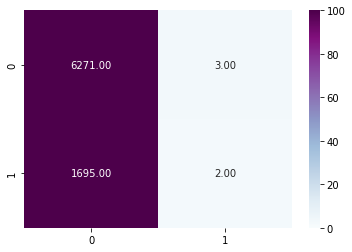

In [29]:
from sklearn.metrics import cluster

log_table = cluster.contingency_matrix(y_test, pred_log)
print(log_table)

sns.heatmap(log_table, annot=True, fmt='.2f',cmap="BuPu", vmin=0.0, vmax=100.0)

In [30]:
log_prediction = model_log.predict_proba(test_df)[:,1]

labels = test_df['id']
log_submission = pd.DataFrame(np.array([labels, log_prediction]).T, columns = ['id', 'failure'])
log_submission['id'] = log_submission['id'].astype(int)
log_submission.head()

,id,failure
0,26570,0.188167
1,26571,0.173586
2,26572,0.183911
3,26573,0.184001
4,26574,0.321598


In [31]:
log_submission.to_csv('log_submission.csv', index=False)